# DS-NYC-45 | Final Project 3: Exploratory Data Analysis

### 1) Load python libraries & data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

In [2]:
users = pd.read_csv(os.path.join('project_dataset', 'user_data.csv'), index_col='user_id')
res = pd.read_csv(os.path.join('project_dataset', 'reservations_data.csv'), index_col='user_id')


### 2) Merge & Clean Data

In [3]:
df = pd.concat([users, res], axis=1, join_axes=[users.index])

df.head()

,is_converted,lead_created_month,lead_created_day_of_week,is_paidsocial_lead,is_organic_lead,lead_msa_id,is_seo_studios,is_inviteafriend,is_email,is_referral,is_paidsocial,marketing_channel,is_organic,user_acquisition_month,user_acquisition_day_of_week,promo_days,lead_to_promo_days,is_three_studio_visits,is_two_studio_visits,is_four_studio_visits,acquisition_plan_category,zip,is_onboarded,user_country,user_msa_id,promo_alias,parent_promo,promo_category,is_commitment_plan,avg_class_rating,avg_days_from_booking_to_class,avg_peak_classes,reservations_attended_barre_count,reservations_attended_boxing_count,reservations_attended_cycling_count,reservations_attended_dance_count,reservations_attended_gym_count,reservations_attended_martial_arts_count,reservations_attended_pilates_count,reservations_attended_rowing_count,reservations_attended_strength_training_count,reservations_attended_yoga_count,reservations_attended_t1_count,reservations_attended_t2_count,reservations_attended_t3_count,reservations_attended_count,reservations_missed_count,reservations_late_cancelled_count,cost_of_all_reservations_in_usd_no_tax
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12,0,5,4,0,1,1.0,0,0,0,0,0,Sell Page,1,9.0,3.0,NaN,0,1,0,0,CP Complimentary,10001,1,1.0,1.0,no_promo,no_promo,no_promo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,0,5,5,0,1,1.0,0,0,0,0,0,Sell Page,1,9.0,3.0,NaN,0,1,0,0,CP Complimentary,10009,1,1.0,1.0,no_promo,no_promo,no_promo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,1,6,1,0,1,1.0,0,0,0,0,0,Mobile,1,9.0,1.0,NaN,0,0,1,0,CP Base,10003,1,1.0,1.0,no_promo,no_promo,no_promo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,1,7,3,0,1,1.0,0,0,0,0,0,Sell Page,1,8.0,4.0,NaN,0,1,0,0,CP Unlimited,NaN,1,1.0,1.0,no_promo,no_promo,no_promo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,1,6,1,0,1,1.0,0,0,0,0,0,Sell Page,0,8.0,3.0,30.0,429,0,1,0,CP Base,30363,1,1.0,1.0,aug1fb,dollarpromo,trial,0.0,5.0,1.25,0.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,25.0


In [4]:
df.isnull().sum()

is_converted                                          0
lead_created_month                                    0
lead_created_day_of_week                              0
is_paidsocial_lead                                    0
is_organic_lead                                       0
lead_msa_id                                        8583
is_seo_studios                                        0
is_inviteafriend                                      0
is_email                                              0
is_referral                                           0
is_paidsocial                                         0
marketing_channel                                     0
is_organic                                            0
user_acquisition_month                               12
user_acquisition_day_of_week                         12
promo_days                                       192495
lead_to_promo_days                                    0
is_three_studio_visits                          

In [5]:
# Replace NA's with 0's
df = df.fillna(0)
df.head()

,is_converted,lead_created_month,lead_created_day_of_week,is_paidsocial_lead,is_organic_lead,lead_msa_id,is_seo_studios,is_inviteafriend,is_email,is_referral,is_paidsocial,marketing_channel,is_organic,user_acquisition_month,user_acquisition_day_of_week,promo_days,lead_to_promo_days,is_three_studio_visits,is_two_studio_visits,is_four_studio_visits,acquisition_plan_category,zip,is_onboarded,user_country,user_msa_id,promo_alias,parent_promo,promo_category,is_commitment_plan,avg_class_rating,avg_days_from_booking_to_class,avg_peak_classes,reservations_attended_barre_count,reservations_attended_boxing_count,reservations_attended_cycling_count,reservations_attended_dance_count,reservations_attended_gym_count,reservations_attended_martial_arts_count,reservations_attended_pilates_count,reservations_attended_rowing_count,reservations_attended_strength_training_count,reservations_attended_yoga_count,reservations_attended_t1_count,reservations_attended_t2_count,reservations_attended_t3_count,reservations_attended_count,reservations_missed_count,reservations_late_cancelled_count,cost_of_all_reservations_in_usd_no_tax
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12,0,5,4,0,1,1.0,0,0,0,0,0,Sell Page,1,9.0,3.0,0.0,0,1,0,0,CP Complimentary,10001,1,1.0,1.0,no_promo,no_promo,no_promo,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0,5,5,0,1,1.0,0,0,0,0,0,Sell Page,1,9.0,3.0,0.0,0,1,0,0,CP Complimentary,10009,1,1.0,1.0,no_promo,no_promo,no_promo,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,1,6,1,0,1,1.0,0,0,0,0,0,Mobile,1,9.0,1.0,0.0,0,0,1,0,CP Base,10003,1,1.0,1.0,no_promo,no_promo,no_promo,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,1,7,3,0,1,1.0,0,0,0,0,0,Sell Page,1,8.0,4.0,0.0,0,1,0,0,CP Unlimited,0,1,1.0,1.0,no_promo,no_promo,no_promo,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,1,6,1,0,1,1.0,0,0,0,0,0,Sell Page,0,8.0,3.0,30.0,429,0,1,0,CP Base,30363,1,1.0,1.0,aug1fb,dollarpromo,trial,0.0,5.0,1.25,0.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,25.0


### 3) Learn about all the data

In [6]:
df.shape

(586207, 49)

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_converted,586207.0,0.650303,0.476875,0.0,0.0,1.00,1.000000,1.0
lead_created_month,586207.0,6.125043,3.526731,1.0,3.0,6.00,9.000000,12.0
lead_created_day_of_week,586207.0,2.856290,1.825015,0.0,1.0,3.00,4.000000,6.0
is_paidsocial_lead,586207.0,0.087496,0.282561,0.0,0.0,0.00,0.000000,1.0
is_organic_lead,586207.0,0.796981,0.402247,0.0,1.0,1.00,1.000000,1.0
lead_msa_id,586207.0,9.659443,11.582915,0.0,1.0,4.00,13.000000,42.0
is_seo_studios,586207.0,0.004306,0.065476,0.0,0.0,0.00,0.000000,1.0
is_inviteafriend,586207.0,0.028696,0.166952,0.0,0.0,0.00,0.000000,1.0
is_email,586207.0,0.166982,0.372960,0.0,0.0,0.00,0.000000,1.0
is_referral,586207.0,0.057449,0.232699,0.0,0.0,0.00,0.000000,1.0


Findings
- Potential outliers or errors in the formulas for avg_hours_from_booking_to_class & reservation_counts
- Would not expect to see max reservations attended above 100's for a trial period

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586207 entries, 12 to 1395495
Data columns (total 49 columns):
is_converted                                     586207 non-null int64
lead_created_month                               586207 non-null int64
lead_created_day_of_week                         586207 non-null int64
is_paidsocial_lead                               586207 non-null int64
is_organic_lead                                  586207 non-null int64
lead_msa_id                                      586207 non-null float64
is_seo_studios                                   586207 non-null int64
is_inviteafriend                                 586207 non-null int64
is_email                                         586207 non-null int64
is_referral                                      586207 non-null int64
is_paidsocial                                    586207 non-null int64
marketing_channel                                586207 non-null object
is_organic                      

### 4) Examine the Dependent Variable (is_converted)

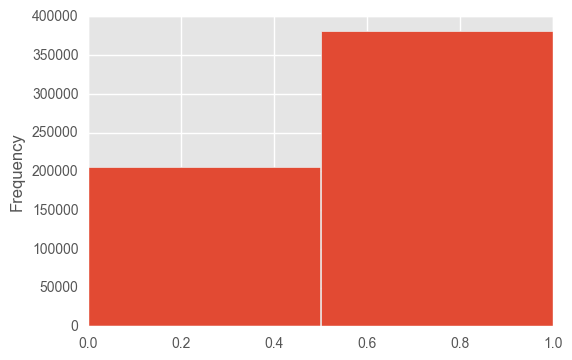

In [9]:
## Histogram to show the number of subscriber conversions
df['is_converted'].plot(kind='hist', bins=2)


In [10]:
df['is_converted'].value_counts()


1    381212
0    204995
Name: is_converted, dtype: int64

In [11]:
# Calculation of conversion rate
115025.0/133329

0.8627155382549933

### 5) Examine Correlations of Variables

In [12]:
corrdf = df.corr()
corrdf

,is_converted,lead_created_month,lead_created_day_of_week,is_paidsocial_lead,is_organic_lead,lead_msa_id,is_seo_studios,is_inviteafriend,is_email,is_referral,is_paidsocial,is_organic,user_acquisition_month,user_acquisition_day_of_week,promo_days,lead_to_promo_days,is_three_studio_visits,is_two_studio_visits,is_four_studio_visits,is_onboarded,user_country,user_msa_id,is_commitment_plan,avg_class_rating,avg_days_from_booking_to_class,avg_peak_classes,reservations_attended_barre_count,reservations_attended_boxing_count,reservations_attended_cycling_count,reservations_attended_dance_count,reservations_attended_gym_count,reservations_attended_martial_arts_count,reservations_attended_pilates_count,reservations_attended_rowing_count,reservations_attended_strength_training_count,reservations_attended_yoga_count,reservations_attended_t1_count,reservations_attended_t2_count,reservations_attended_t3_count,reservations_attended_count,reservations_missed_count,reservations_late_cancelled_count,cost_of_all_reservations_in_usd_no_tax
is_converted,1.000000,0.050327,-0.015841,-0.085362,0.015822,-0.103732,-0.019470,-0.137418,0.043904,0.011495,-0.209883,0.409236,0.074186,-0.023199,-0.206017,-0.042767,0.305906,-0.316444,0.028077,0.249619,-0.125930,-0.104625,-0.098449,-0.313842,-0.208714,-0.293022,0.006409,-0.031295,-0.015501,-0.023165,-0.031848,-0.016378,0.005183,-0.009529,-0.018892,-0.027835,-0.019215,-0.009375,-0.035049,-0.025017,-0.047837,-0.004257,-0.027396
lead_created_month,0.050327,1.000000,0.005674,0.029390,-0.047121,-0.031264,0.023709,0.067803,-0.060709,0.002120,-0.030391,-0.007004,0.701866,0.012666,0.047345,-0.023865,-0.168836,0.178257,-0.021253,-0.229126,0.008956,-0.029026,-0.016637,0.021295,-0.019978,0.001395,-0.014664,-0.004983,-0.006851,-0.011213,0.005439,-0.008520,-0.017095,-0.003587,-0.015278,-0.019176,-0.016698,-0.025288,-0.013079,-0.021404,0.007649,-0.036752,-0.015080
lead_created_day_of_week,-0.015841,0.005674,1.000000,0.024506,-0.007822,-0.004058,0.000667,0.011312,0.009772,-0.005187,0.019096,-0.014749,0.012560,0.506407,0.019013,0.003957,-0.014691,0.015914,-0.003767,-0.016301,-0.008442,-0.004635,0.017544,0.006989,0.002338,-0.002545,0.005335,0.000547,0.002364,0.006089,0.000608,0.000235,0.005545,0.003532,0.003386,0.003151,0.004027,0.007082,-0.000860,0.005933,0.000464,0.004467,0.004563
is_paidsocial_lead,-0.085362,0.029390,0.024506,1.000000,-0.613527,0.107227,-0.014554,-0.044871,-0.032920,-0.056601,0.294862,-0.187060,0.061589,0.025242,0.150425,0.003792,-0.115605,0.123904,-0.010347,-0.186287,0.108171,0.111058,0.115482,0.115688,0.062648,0.090915,0.038325,0.033950,0.037741,0.043926,0.006931,0.015964,0.052823,0.018616,0.054508,0.057725,0.057979,0.058073,0.069407,0.074404,0.032456,0.019924,0.070381
is_organic_lead,0.015822,-0.047121,-0.007822,-0.613527,1.000000,-0.060974,0.018875,0.071308,0.001406,0.066194,-0.151855,0.236535,-0.062848,-0.012731,-0.078964,-0.038992,0.053759,-0.062064,0.006552,0.121311,-0.060752,-0.076222,-0.064969,-0.071558,-0.022476,-0.046047,-0.027921,-0.018794,-0.020953,-0.029565,-0.005257,-0.007090,-0.038149,-0.009848,-0.031378,-0.036493,-0.036471,-0.039566,-0.045750,-0.046672,-0.017888,-0.010183,-0.042680
lead_msa_id,-0.103732,-0.031264,-0.004058,0.107227,-0.060974,1.000000,-0.008881,-0.028993,-0.025382,0.038584,0.132786,-0.126025,-0.006124,-0.008675,0.055711,-0.045842,-0.062051,0.024792,0.108654,-0.071971,0.758563,0.946385,0.044292,0.082238,0.085094,0.088161,-0.009348,0.047751,-0.007721,-0.017467,-0.030718,-0.019102,0.086173,-0.025469,0.061999,0.077036,-0.013949,0.062402,0.157753,0.059878,0.000930,0.012137,0.000632
is_seo_studios,-0.019470,0.023709,0.000667,-0.014554,0.018875,-0.008881,1.000000,0.043316,-0.029232,-0.016235,-0.030983,-0.016531,0.025917,0.001022,0.008021,0.002001,-0.069759,0.069709,-0.002406,-0.059761,-0.007908,-0.009141,-0.018872,0.009245,0.002501,0.012155,-0.009352,-0.002028,-0.009323,-0.002890,-0.004031,-0.001907,-0.009091,-0.004291,-0.011291,-0.009075,-0.014094,-0.009805,-0.007004,-0.014116,-0.0

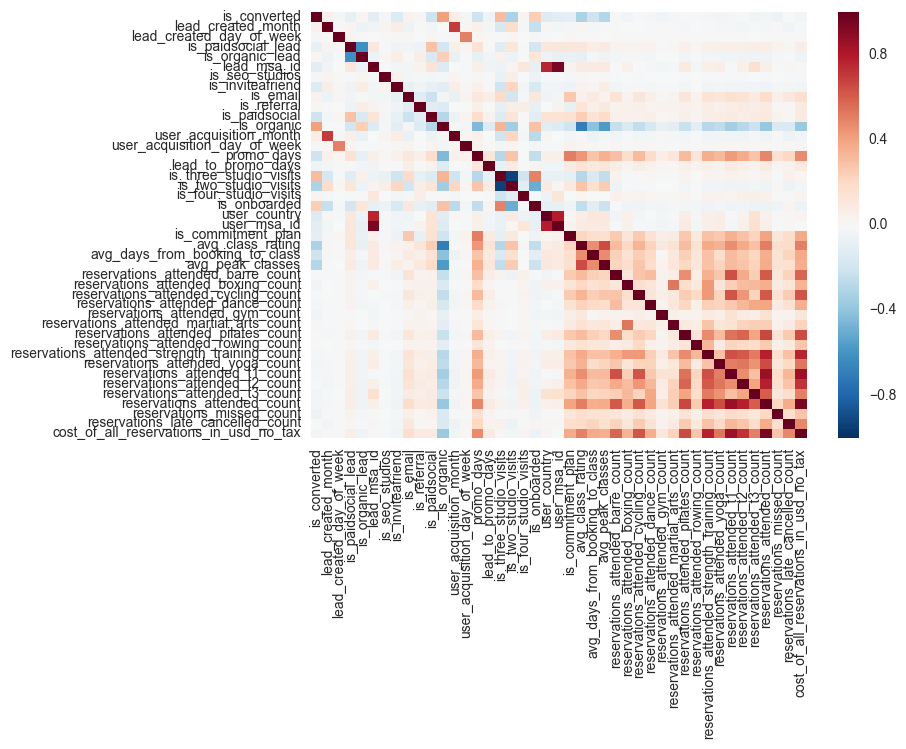

In [13]:
# Correlation matrix heat map
sns.set(style="dark")

sns.heatmap(corrdf)

Findings
- seeing expected correlation with user and lead information (lead & user month, lead & user msa)
- promo days and promo to sub days are likely correlated because of the high number with 0 and 0 days
- attended reservationds are also correlated because they are overlapping cuts of the same number with different filters

### 6) Examine Each Variable

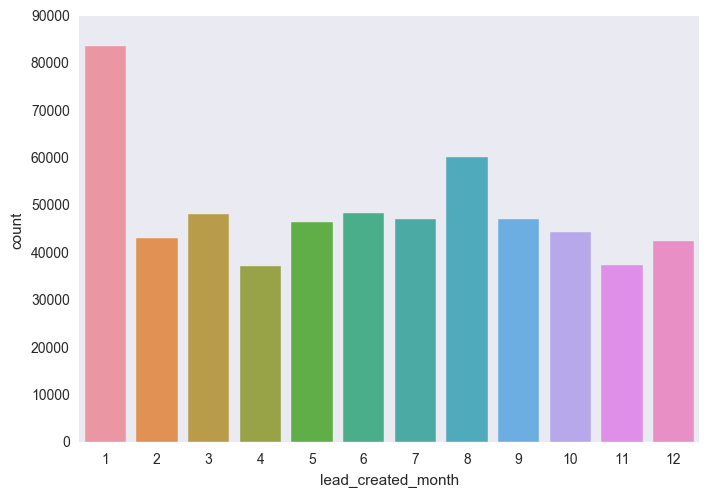

In [14]:
# lead created month
sns.countplot(x="lead_created_month", data=df)

Finding: Two highest months for leads are January & August

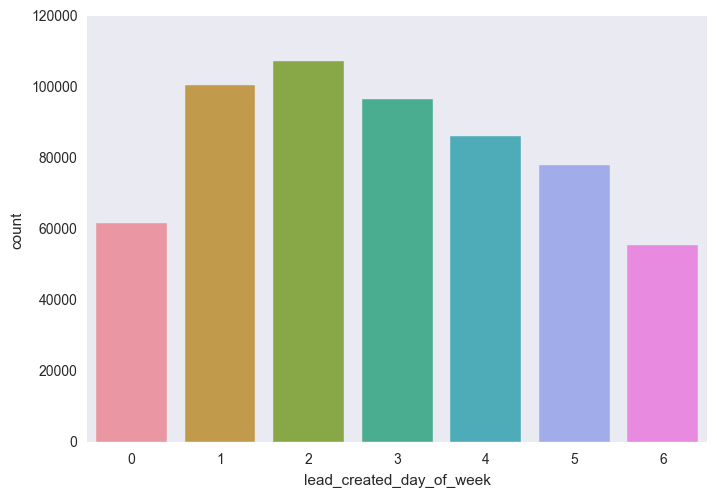

In [15]:
# lead created day of week
sns.countplot(x="lead_created_day_of_week", data=df)

Finding: Leads tend to be created earlier in the week

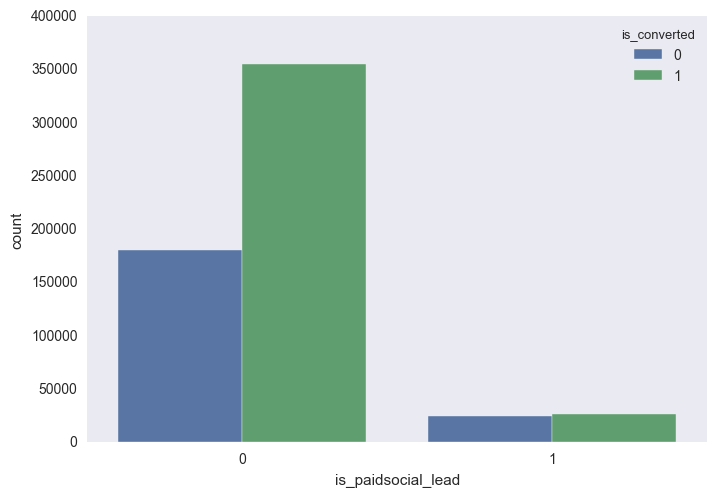

In [16]:
# is_paidsocial_lead
sns.countplot(x="is_paidsocial_lead", hue='is_converted', data=df)

Finding: Majority of conversions are not from paidsocial.

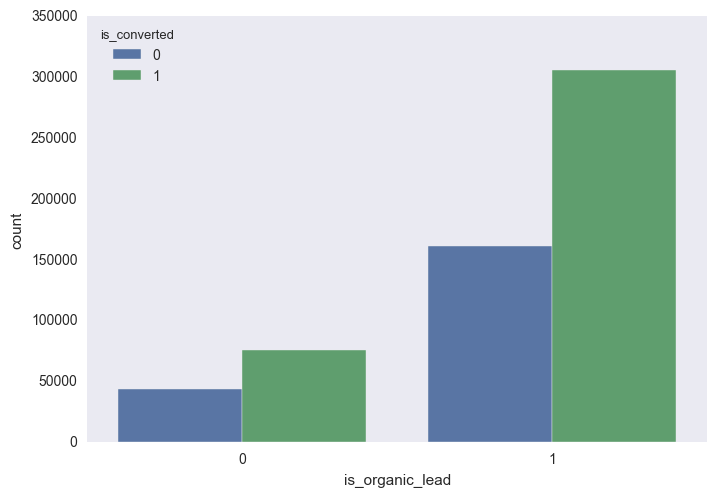

In [17]:
# is_organic_lead
sns.countplot(x="is_organic_lead", hue='is_converted', data=df)

Finding: Organic leads are very likely to convert

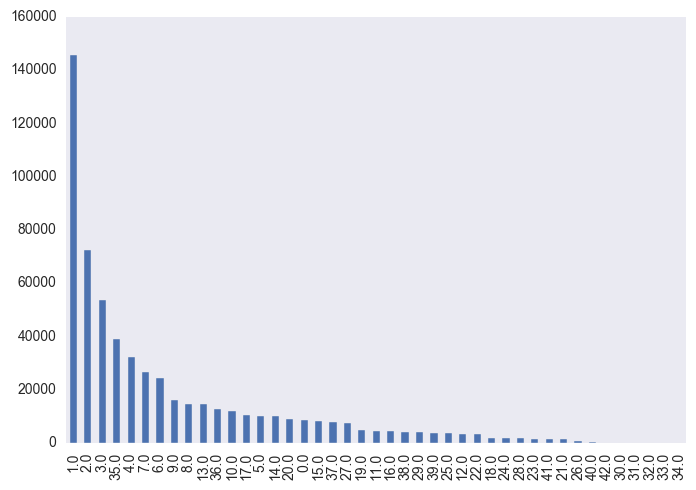

In [18]:
#lead_msa_id
df['lead_msa_id'].value_counts().plot(kind='bar')

Finding: Lead msa id follows subscriber trends

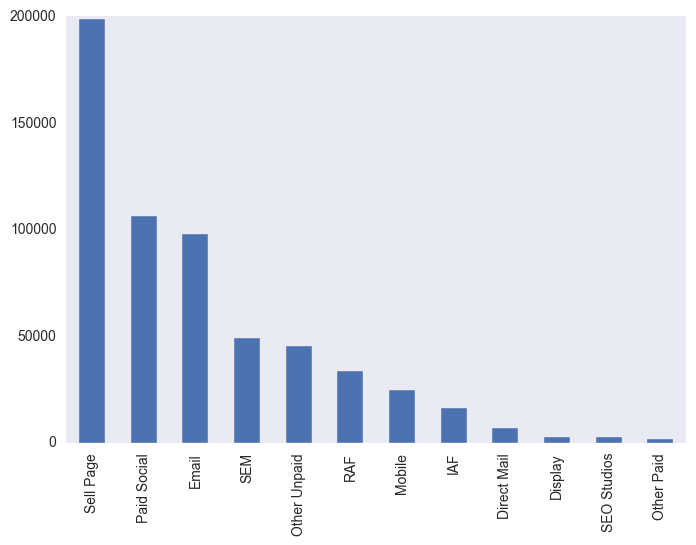

In [19]:
#examining marketing channel
#(includes related booleans of is_seo_studios, is_inviteafriend, is_email, is_referral, is_paidsocial)
df['marketing_channel'].value_counts().plot(kind='bar')

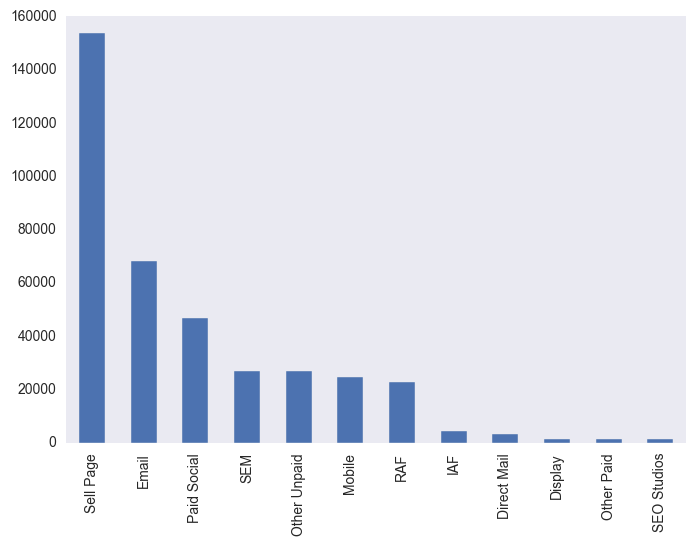

In [20]:
#examining marketing channel for converted
#(includes related booleans of is_seo_studios, is_inviteafriend, is_email, is_referral, is_paidsocial, is_organic)
conv_users_marketing_channel = df[['marketing_channel','is_converted']]
conv_users_marketing_channel = conv_users_marketing_channel[(conv_users_marketing_channel['is_converted']==1)]
conv_users_marketing_channel['marketing_channel'].value_counts().plot(kind='bar')

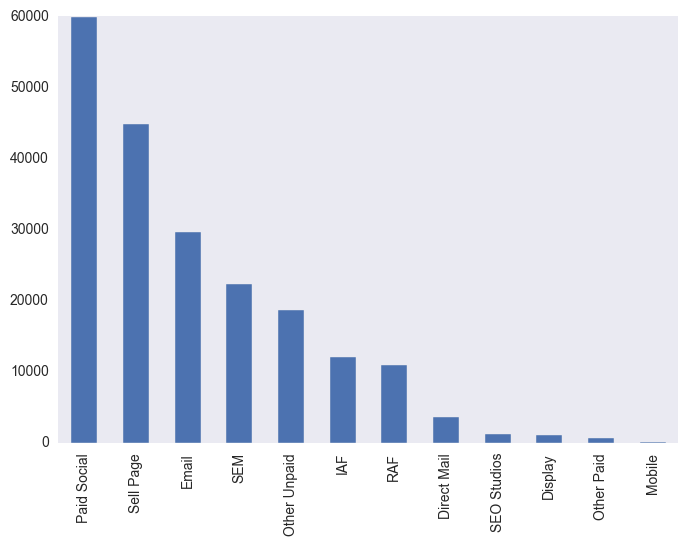

In [21]:
#examining marketing channel for not converted
#(includes related booleans of is_seo_studios, is_inviteafriend, is_email, is_referral, is_paidsocial)
nonconv_users_marketing_channel = df[['marketing_channel','is_converted']]
nonconv_users_marketing_channel = nonconv_users_marketing_channel[(nonconv_users_marketing_channel['is_converted']==0)]
nonconv_users_marketing_channel['marketing_channel'].value_counts().plot(kind='bar')

Finding: Users from the Sell Page channel who are likely organic appear to be the largest group of users to convert

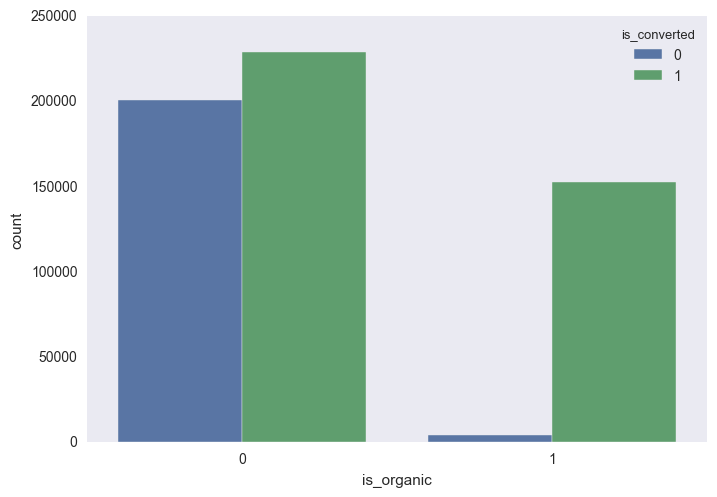

In [22]:
# is_organic
sns.countplot(x="is_organic", hue='is_converted', data=df)

Finding: Organic users are extremely likely to be converted

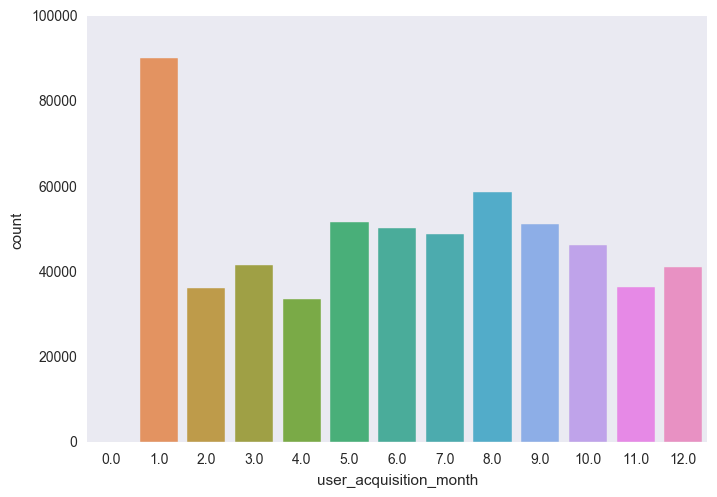

In [23]:
# user_acquisition_month
sns.countplot(x="user_acquisition_month", data=df)

Finding: Significantly more user's are acquired in January

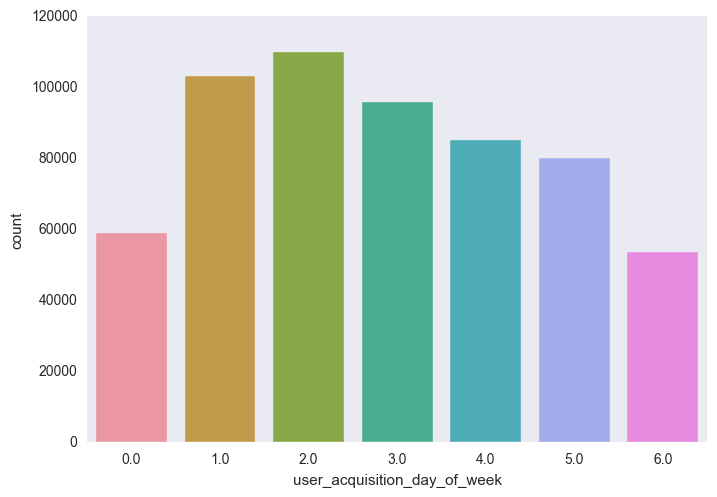

In [24]:
# user_acquisition_day_of_week
sns.countplot(x="user_acquisition_day_of_week", data=df)

Finding: Users are more like to be acquired on weekdays

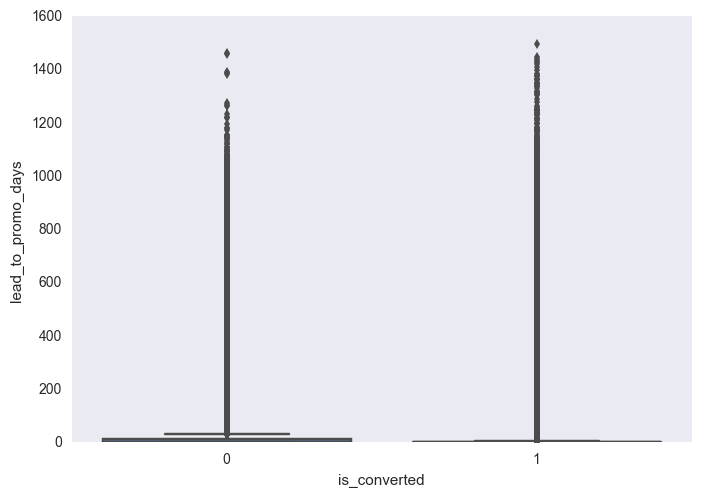

In [25]:
# lead_to_promo_days  
sns.boxplot(x="is_converted", y="lead_to_promo_days", data=df)

Finding: Users who converted directly from promo to lead and have 0 days, dramatically skew the data down and make everything else look like outliers

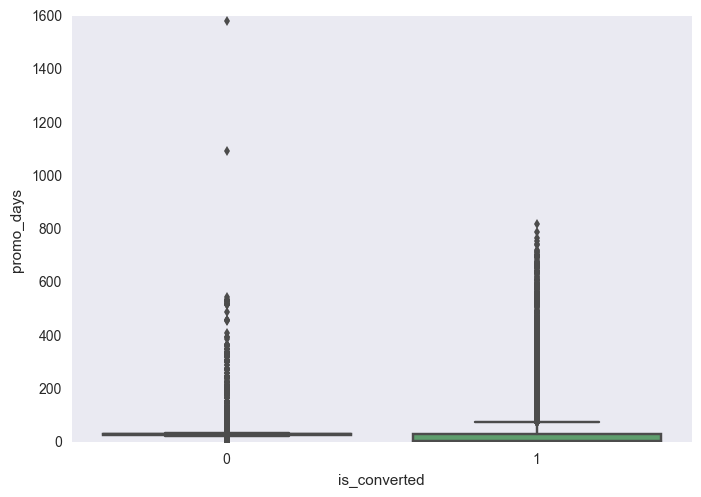

In [26]:
# promo_days  
sns.boxplot(x="is_converted", y="promo_days", data=df)

Finding: Users who did not have a promotion (0 days) dramatically skew the data down

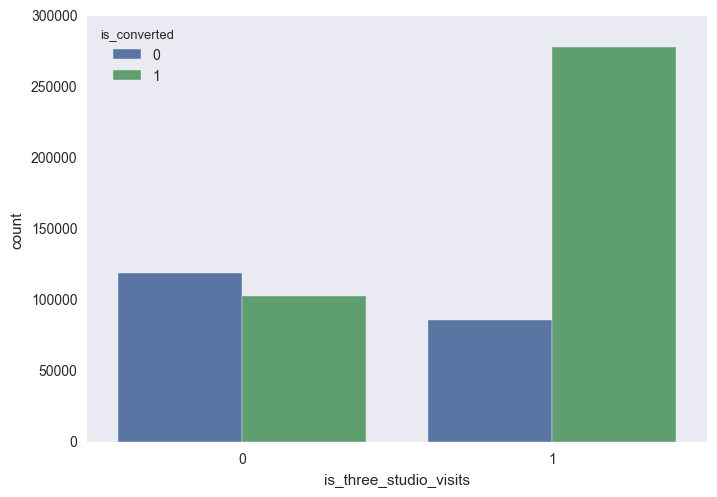

In [27]:
# is_three_studio_visits (provides high level view of is_two_studio_visitrs and is_four_studio_visitrs too)
sns.countplot(x="is_three_studio_visits", hue='is_converted', data=df)

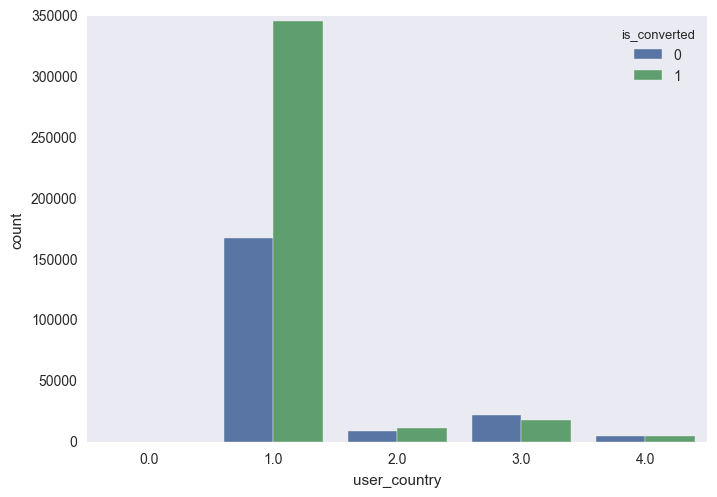

In [28]:
# user_country
sns.countplot(x="user_country", hue='is_converted', data=df)

Finding: Shows how the majority of our activity is still US centric (country code 1.0)

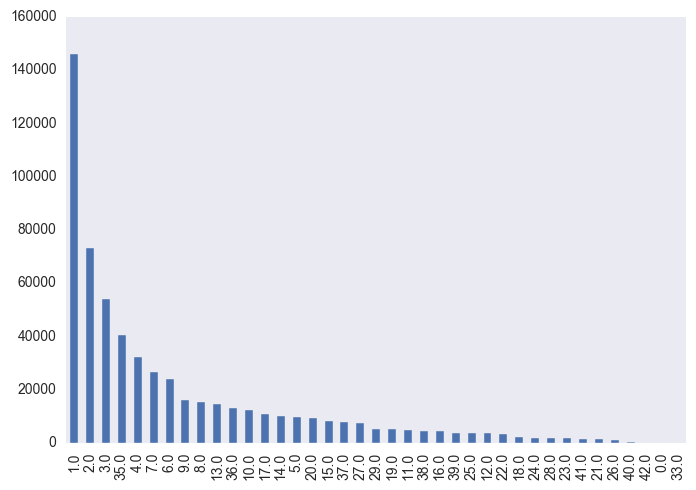

In [29]:
#user_msa_id
df['user_msa_id'].value_counts().plot(kind='bar')

Finding: User MSA's mirror Lead MSA's [retty closely

In [30]:
# promo alias
promo_aliases = pd.crosstab(df['promo_alias'], df['is_converted'], margins=True)
promo_aliases

is_converted,0,1,All
promo_alias,,,
100back,88,1847,1935
100egift,0,1,1
10basehappiyoga,9,5,14
10basetrialbx,107,92,199
10daytrial,210,236,446
10onemonthb,24,18,42
10percentoff5,1,0,1
15basetrial,10,0,10
19austintrial,17,14,31


In [31]:
promo_aliases.shape

(250, 3)

Finding: 248 promo aliases

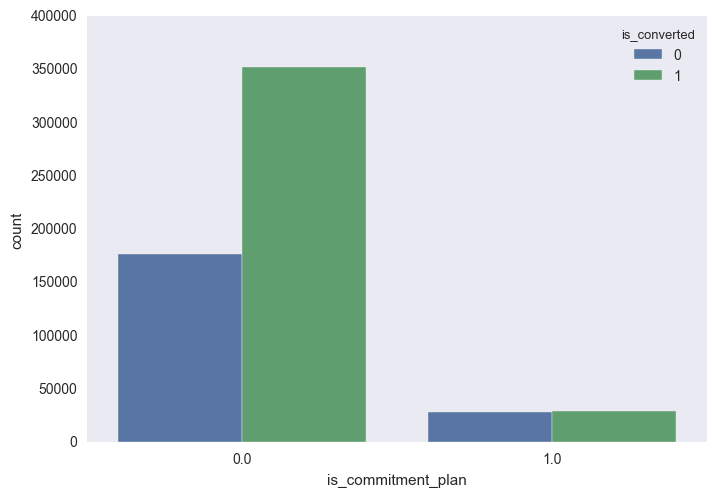

In [32]:
# is_commitment_plan
sns.countplot(x="is_commitment_plan", hue='is_converted', data=df)

Finding: Majority of data is not from commitment plans and those that are look to convert at about 50%. This will most likely not be a strong indicator

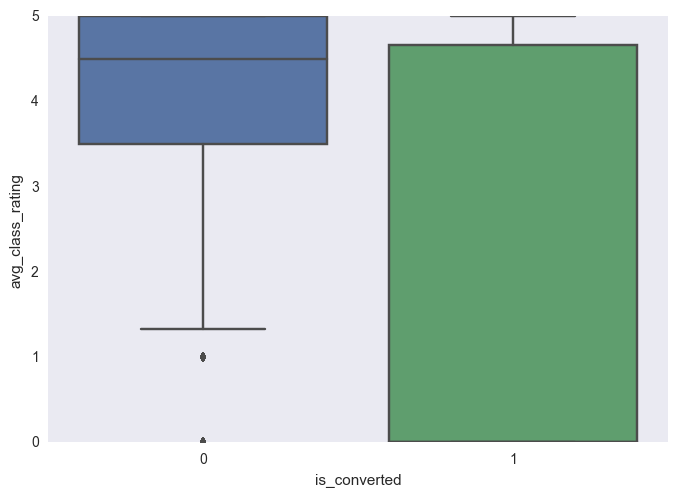

In [33]:
#avg class rating boxplot
sns.boxplot(x="is_converted", y="avg_class_rating", data=df)

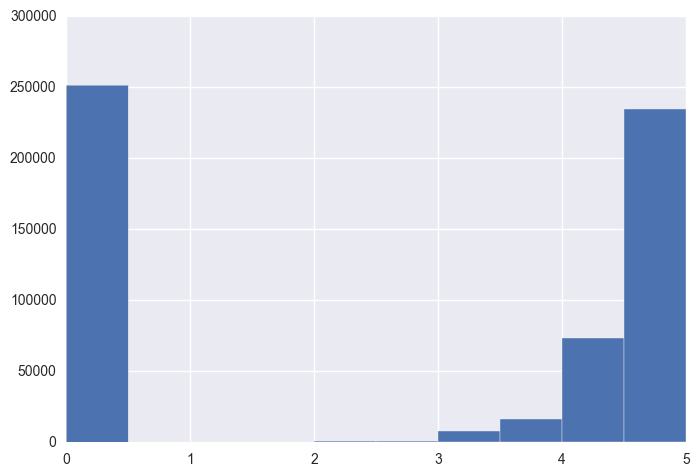

In [34]:
df['avg_class_rating'].hist()

Finding: Avg class rating has a binonmial distribution where there is either no rating (0) or very high rating of 5

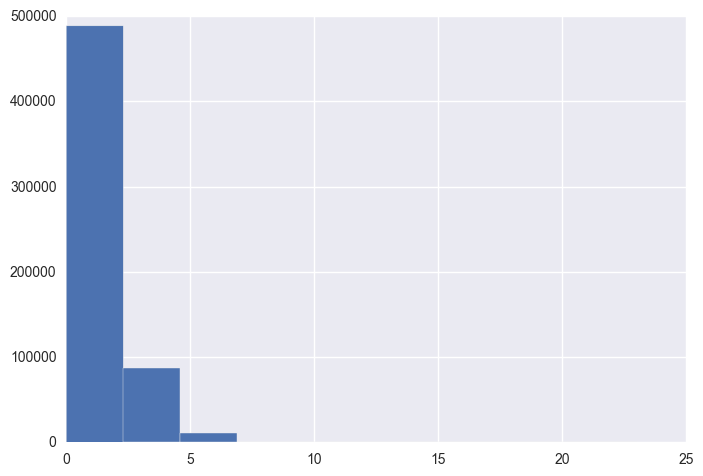

In [35]:
df['avg_days_from_booking_to_class'].hist()

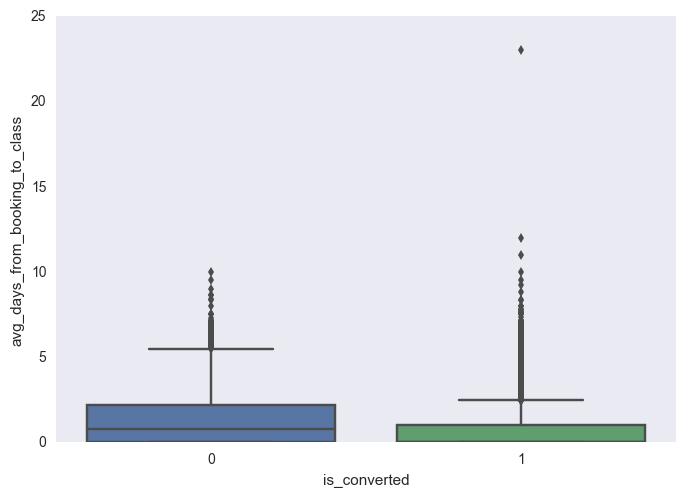

In [36]:
sns.boxplot(x="is_converted", y="avg_days_from_booking_to_class", data=df)

Finding: It appears that the mean for avg_days_from_booking_to_class is lower for converted than non converted, potentially shortening the time between booking class and taking a class will increase likelihood to convert

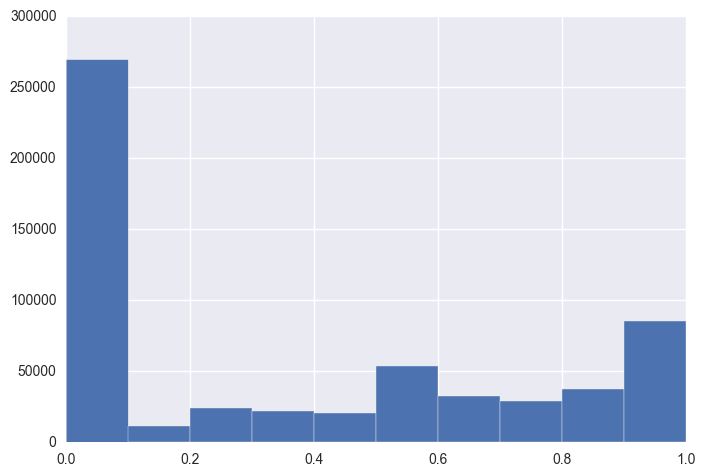

In [37]:
df['avg_peak_classes'].hist()

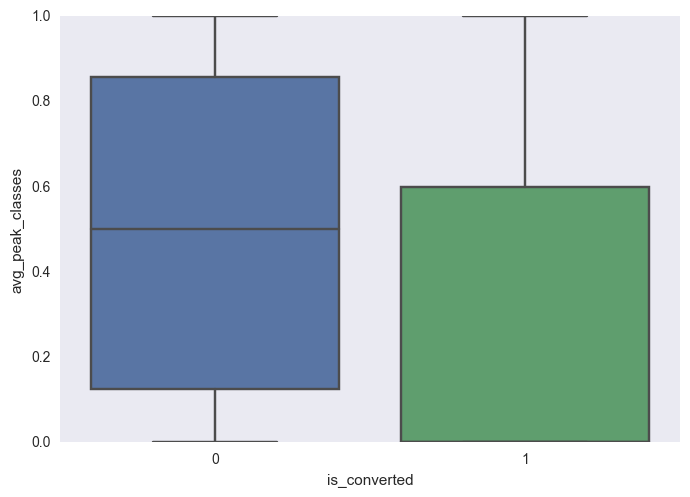

In [38]:
sns.boxplot(x="is_converted", y="avg_peak_classes", data=df)

In [39]:
apc = df[['avg_peak_classes','is_converted']]
apc = apc[(apc['is_converted']==1)]
apc

np.mean(apc['avg_peak_classes'])

0.2786315895601763

Finding: This is surprising to me as I would expect the mean of peak classes to be higher for converted than non

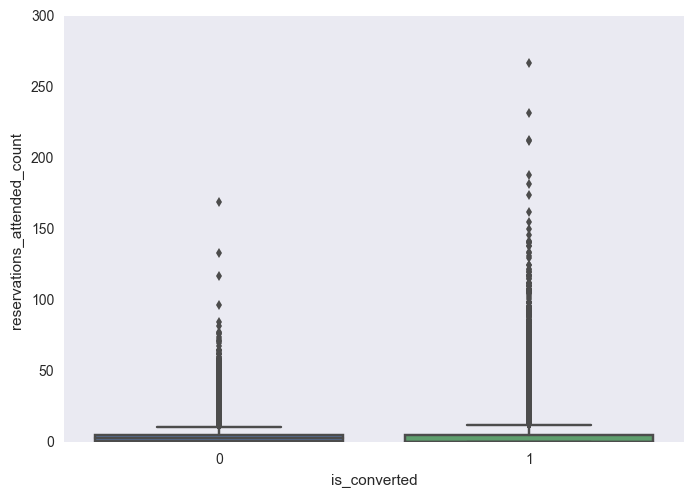

In [40]:
#reservations_attended_count	
sns.boxplot(x="is_converted", y="reservations_attended_count", data=df)

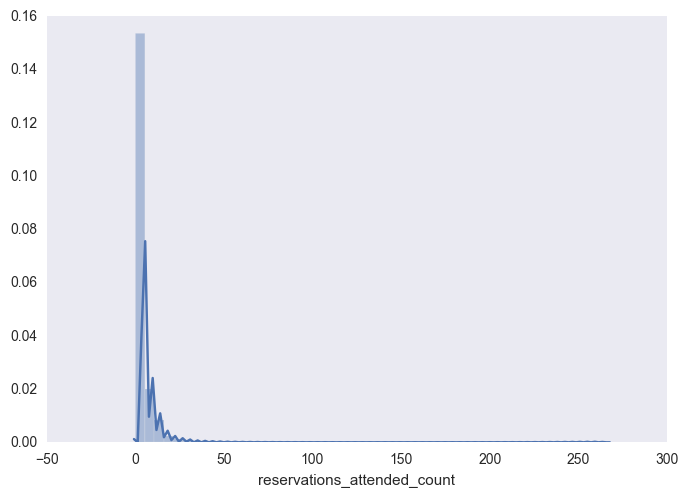

In [41]:
sns.distplot(df['reservations_attended_count'])

Finding: Reservations attended data is skewed to the left with extrme outliers on the right

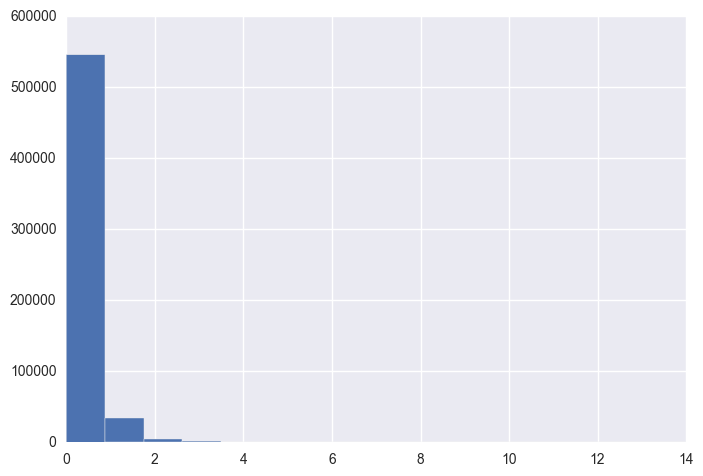

In [42]:
df['reservations_missed_count'].hist(bins=16)

Finding: Majority of trialers do not miss a reservations

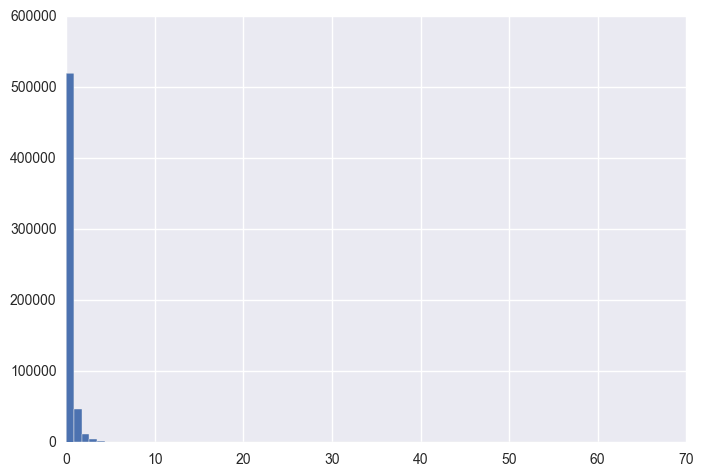

In [43]:
df['reservations_late_cancelled_count'].hist( bins=70)

Finding: More trialers late cancel classes than miss

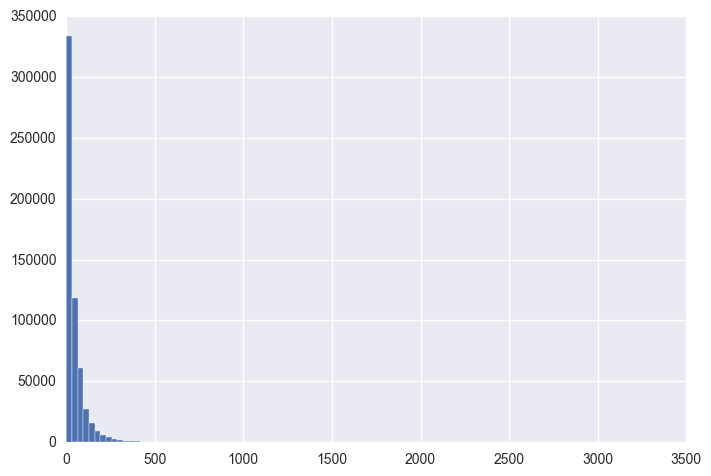

In [44]:
df['cost_of_all_reservations_in_usd_no_tax'].hist( bins=100)

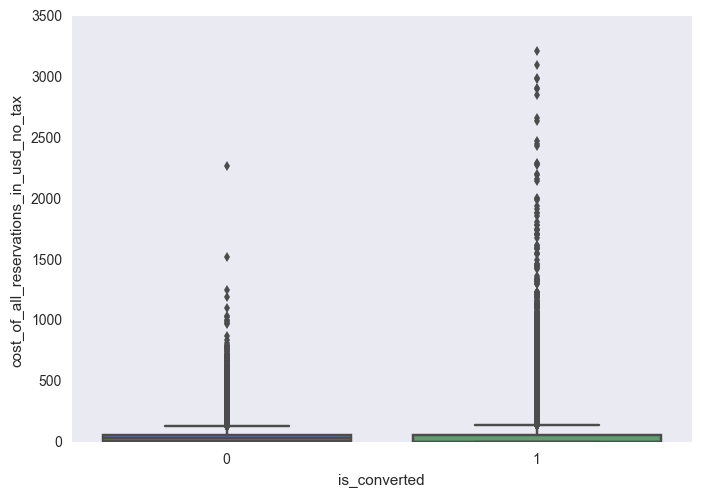

In [45]:
sns.boxplot(x="is_converted", y="cost_of_all_reservations_in_usd_no_tax", data=df)

Finding: Converted trialers contain more of the outliers on class costs than non converted